<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


 ## Hands-on Lab: Complete the EDA with Visualization


Estimated time needed: **70** minutes


In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage. 

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans. 


  ## Objectives
Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

- Exploratory Data Analysis
- Preparing Data  Feature Engineering 


----


Install the below libraries


In [17]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab 



In [18]:
# andas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

## Exploratory Data Analysis 


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [19]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

# If you were unable to complete the previous lab correctly you can uncomment and load this csv

# df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_2.csv')

df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


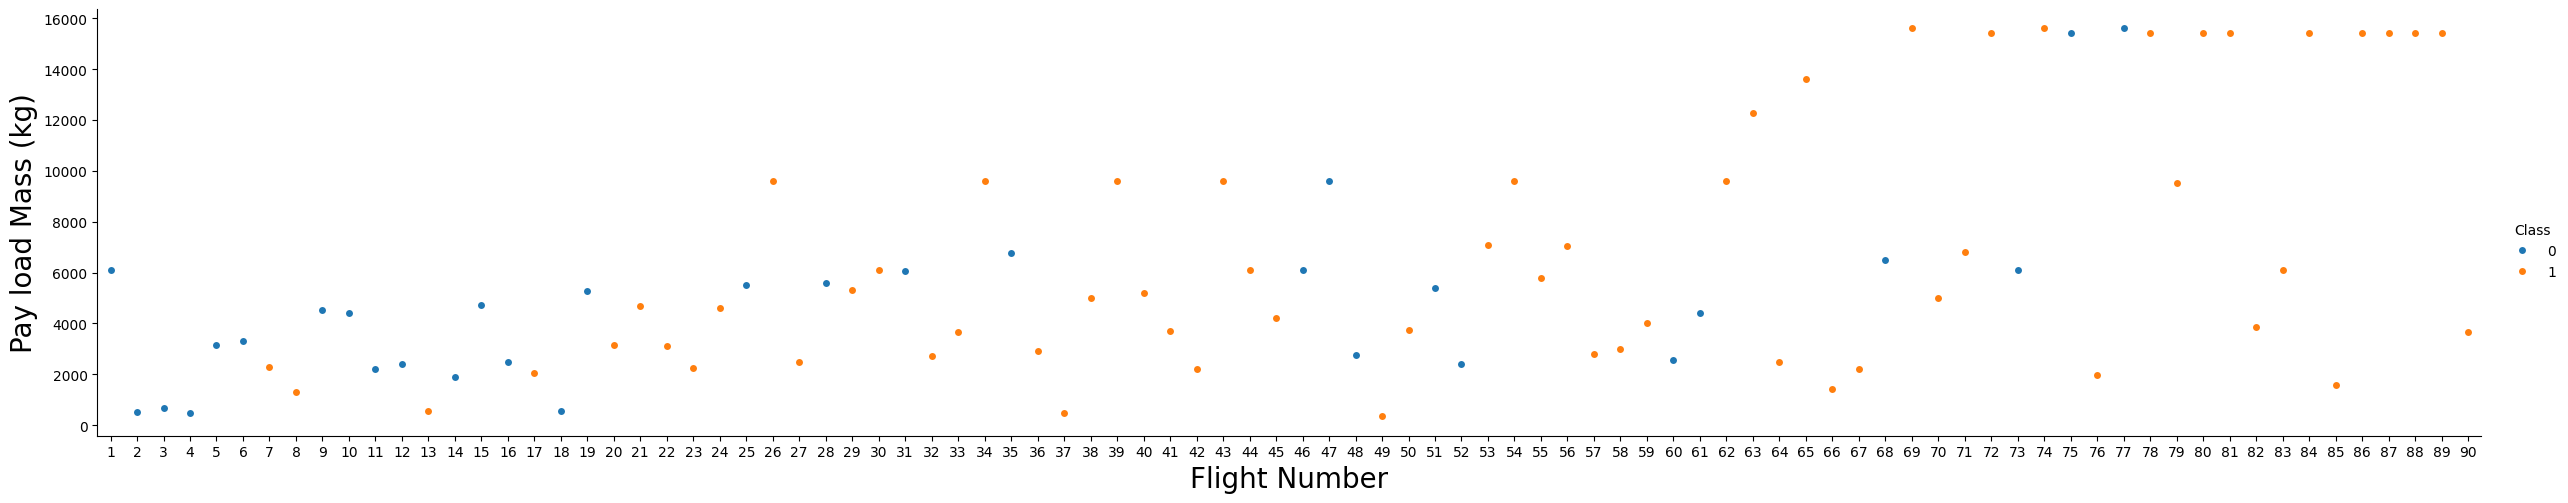

In [20]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

Next, let's drill down to each site visualize its detailed launch records.


### TASK 1: Visualize the relationship between Flight Number and Launch Site


Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


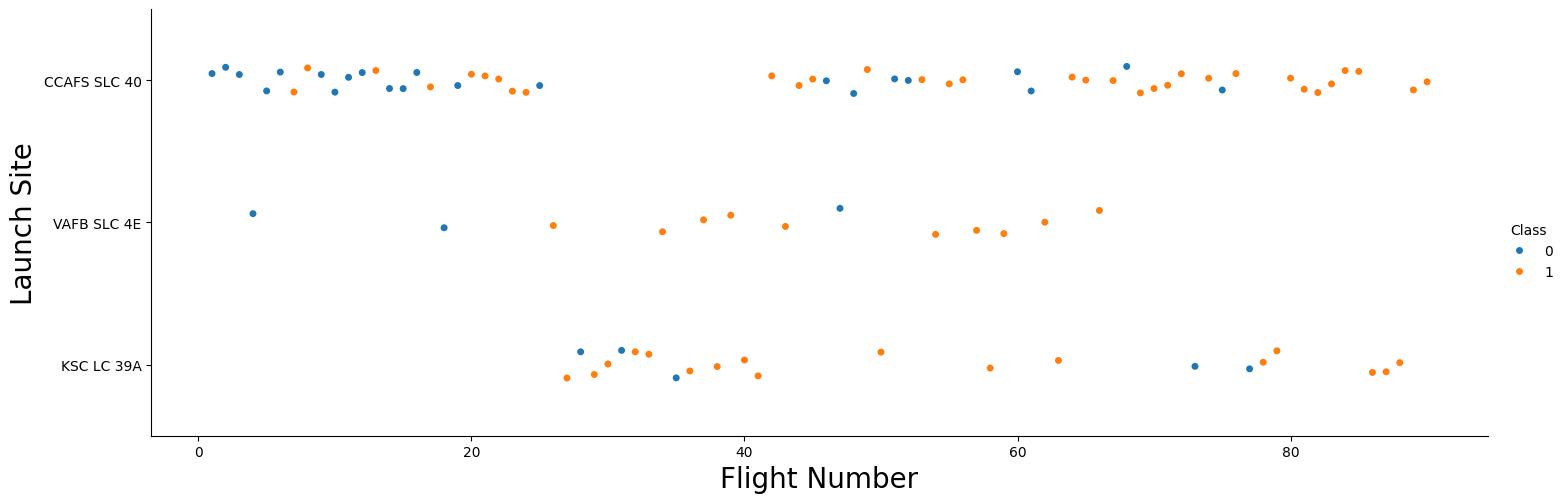

In [21]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 3)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.


### TASK 2: Visualize the relationship between Payload and Launch Site


We also want to observe if there is any relationship between launch sites and their payload mass.


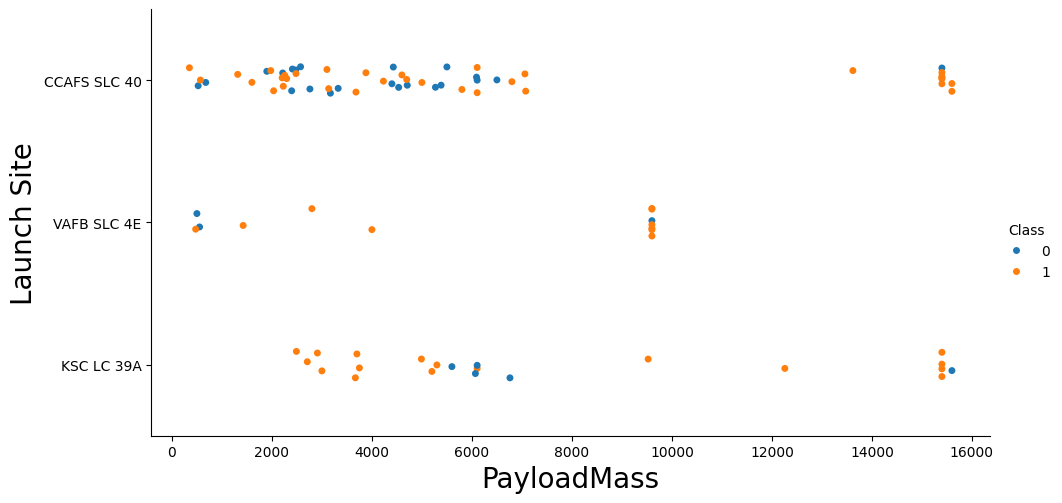

In [22]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df, aspect = 2)
plt.xlabel("PayloadMass",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()


Now if you observe Payload Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).


### TASK  3: Visualize the relationship between success rate of each orbit type


Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


<Axes: xlabel='Orbit', ylabel='Class'>

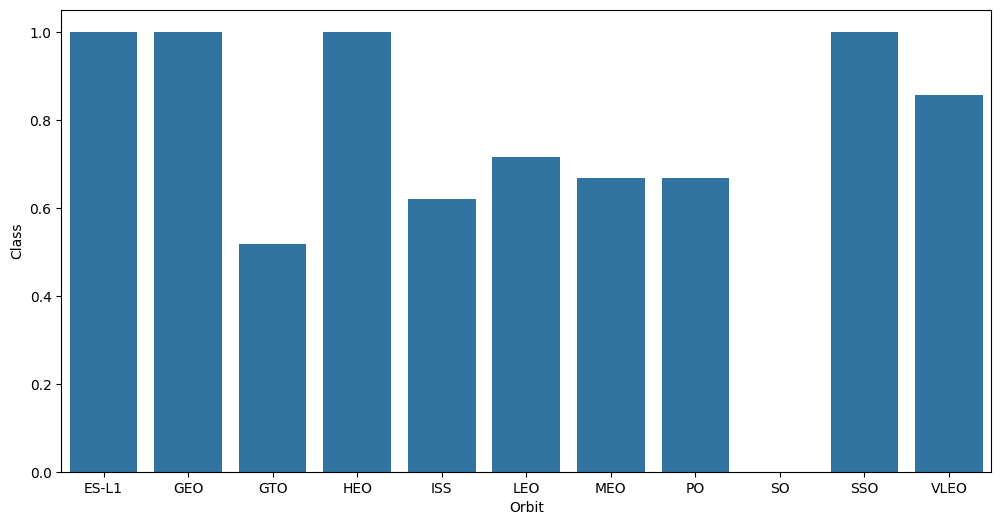

In [23]:
# HINT use groupby method on Orbit column and get the mean of Class column
grouped_df = df.groupby("Orbit", as_index=False)["Class"].mean()

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(
    x="Orbit",
    y="Class",
    data=grouped_df
)

Analyze the ploted bar chart try to find which orbits have high sucess rate.


### TASK  4: Visualize the relationship between FlightNumber and Orbit type


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


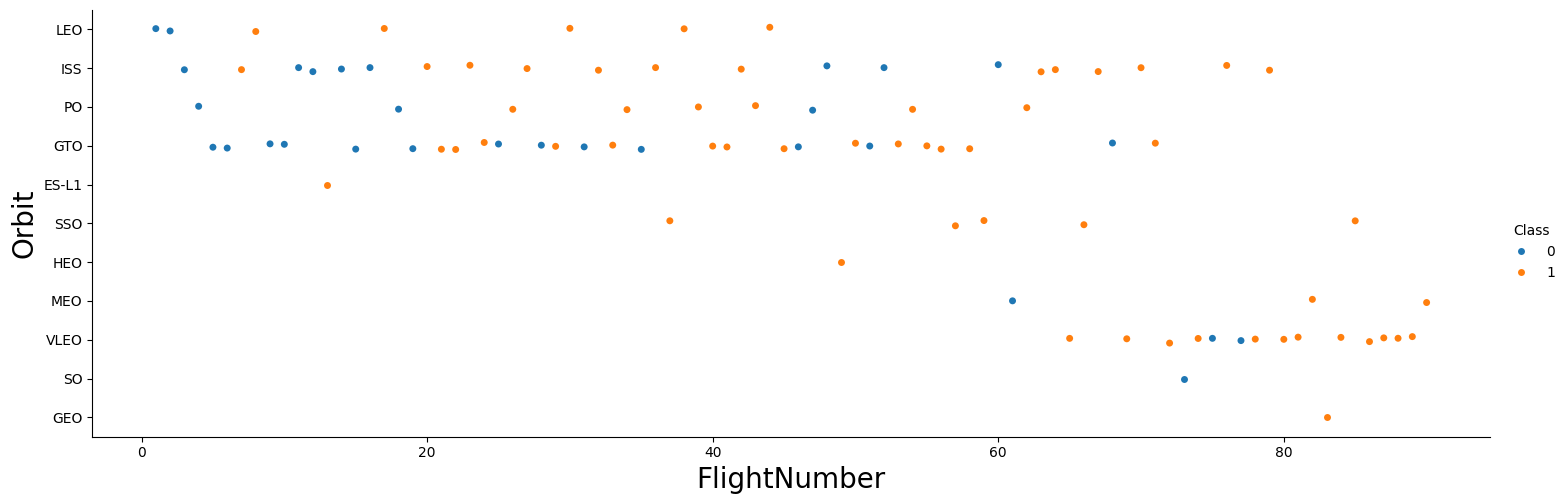

In [24]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=df, aspect = 3)
plt.xlabel("FlightNumber",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.


### TASK  5: Visualize the relationship between Payload and Orbit type


Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


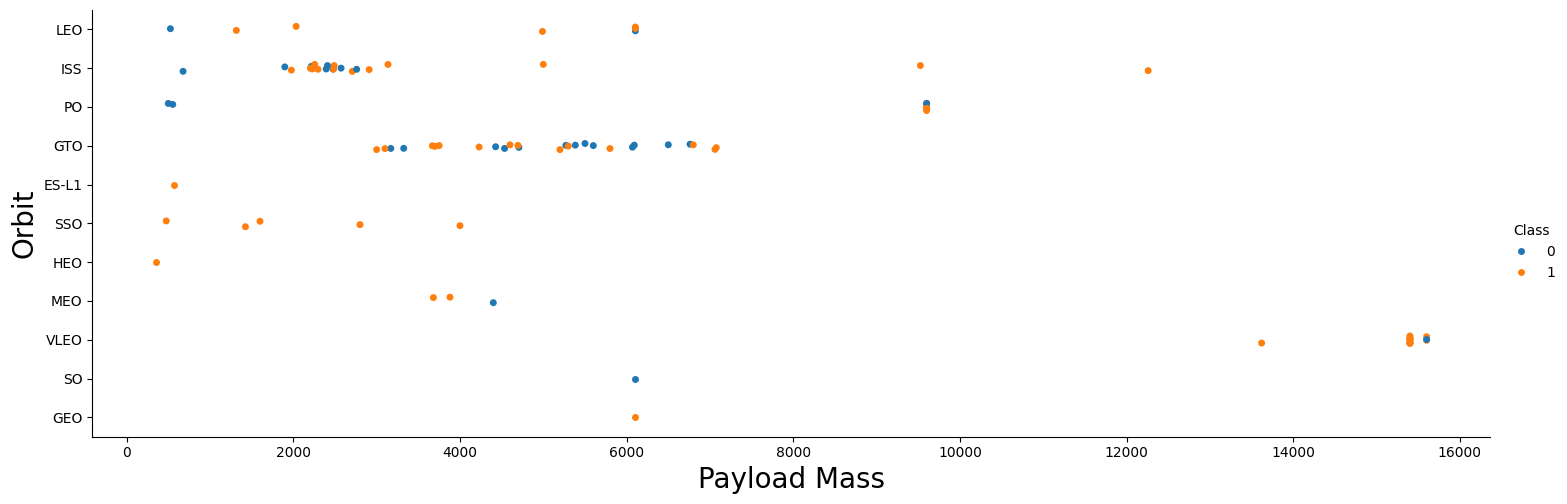

In [25]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
sns.catplot(y="Orbit", x="PayloadMass", hue="Class", data=df, aspect = 3)
plt.xlabel("Payload Mass",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.   

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.




### TASK  6: Visualize the launch success yearly trend


You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend. 


The function will help you get the year from the date:


In [26]:
# A function to Extract years from the date 
year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
    

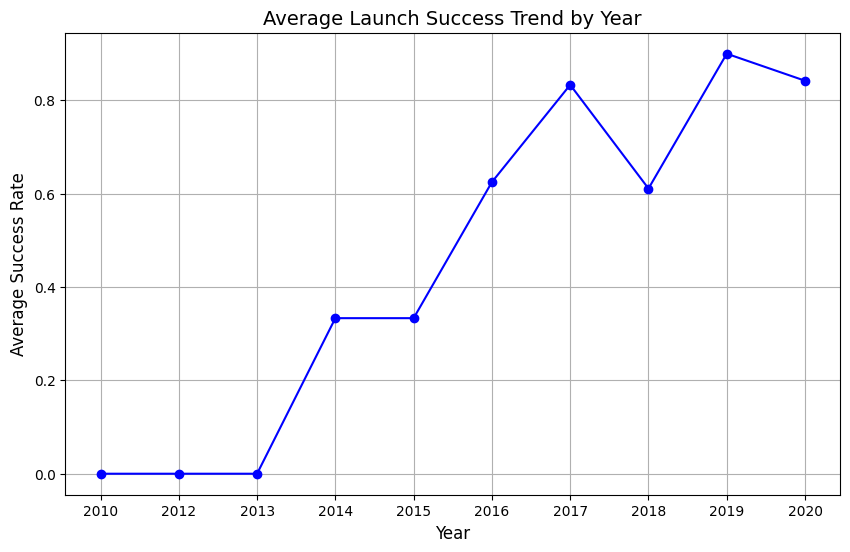

In [27]:
# Updated function to extract years
def Extract_year(date_column):
    return date_column.str.split("-").str[0]

# Add the Year column to the DataFrame
df["Year"] = Extract_year(df["Date"])

# Calculate the average success rate per year
avg_success_rate = df.groupby("Year")["Class"].mean().reset_index()

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(avg_success_rate["Year"], avg_success_rate["Class"], marker="o", linestyle="-", color="b")
plt.title("Average Launch Success Trend by Year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Success Rate", fontsize=12)
plt.grid(True)
plt.show()

You can observe that the success rate since 2013 kept increasing till 2017 (stable in 2014) and after 2015 it started increasing.


## Features Engineering 


By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [28]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


 ### TASK  7: Create dummy variables to categorical columns


Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [29]:
# HINT: Use get_dummies() function on the categorical columns
features_one_hot = pd.get_dummies(features, columns=['LaunchSite', 'LandingPad', 'Serial'])
features_one_hot

,FlightNumber,PayloadMass,Orbit,Flights,GridFins,Reused,Legs,Block,ReusedCount,LaunchSite_CCAFS SLC 40,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,LEO,1,False,False,False,1.0,0,True,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,LEO,1,False,False,False,1.0,0,True,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,ISS,1,False,False,False,1.0,0,True,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,PO,1,False,False,False,1.0,0,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,GTO,1,False,False,False,1.0,0,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,15400.000000,VLEO,2,True,True,True,5.0,2,False,...,False,False,False,False,False,False,False,False,True,False
86,87,15400.000000,VLEO,3,True,True,True,5.0,2,False,...,False,False,False,False,False,False,True,False,False,False
87,88,15400.000000,VLEO,6,True,True,True,5.0,5,False,...,False,False,False,True,False,False,False,False,False,False
88,89,15400.000000,VLEO,3,True,True,True,5.0,2,True,...,False,False,False,False,False,False,False,False,True,False


### TASK  8: Cast all numeric columns to `float64`


Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>


In [30]:
# HINT: use astype function
features_one_hot = features_one_hot.astype({col: 'float64' for col in features_one_hot.select_dtypes(exclude='object').columns})

features_one_hot

,FlightNumber,PayloadMass,Orbit,Flights,GridFins,Reused,Legs,Block,ReusedCount,LaunchSite_CCAFS SLC 40,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6104.959412,LEO,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,LEO,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,ISS,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,PO,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,GTO,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,VLEO,2.0,1.0,1.0,1.0,5.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
86,87.0,15400.000000,VLEO,3.0,1.0,1.0,1.0,5.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
87,88.0,15400.000000,VLEO,6.0,1.0,1.0,1.0,5.0,5.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
88,89.0,15400.000000,VLEO,3.0,1.0,1.0,1.0,5.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range. 


<code>features_one_hot.to_csv('dataset_part_3.csv', index=False)</code>


In [32]:
#PayLoadMass
#Orbit
#LaunchSite

fix_data = df.groupby(["Year","LaunchSite"])["Class"].mean().reset_index()


figure=px.bar(fix_data,
                x='LaunchSite',
                y='Year',
                color='Class',
                #labels={'unemployment_rate': 'Unemployment Rate', 'Automobile_Sales': 'Average Automobile Sales','Vehicle_Type': 'Vehicle Type'},
                title='Effect of Unemployment Rate on Vehicle Type and Sales')

NameError: name 'px' is not defined

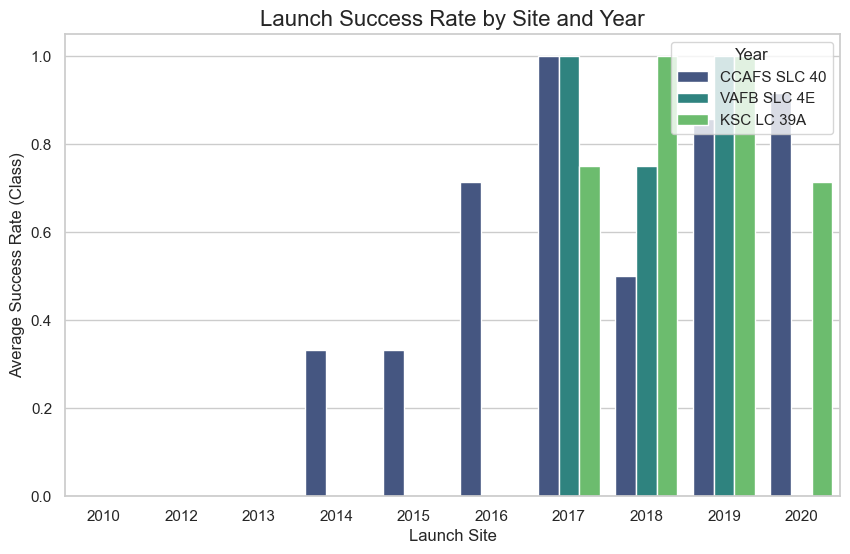

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar o estilo do gráfico
sns.set(style="whitegrid")

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=fix_data,
    x="Year",
    y="Class",  # Certifique-se de que "Class" tenha valores numéricos
    hue="LaunchSite",  # Diferenciar por cor usando "Year"
    palette="viridis"
)

# Adicionar título e rótulos
ax.set_title("Launch Success Rate by Site and Year", fontsize=16)
ax.set_xlabel("Launch Site", fontsize=12)
ax.set_ylabel("Average Success Rate (Class)", fontsize=12)

# Adicionar legenda
plt.legend(title="Year", loc="upper right")

# Mostrar o gráfico
plt.show()


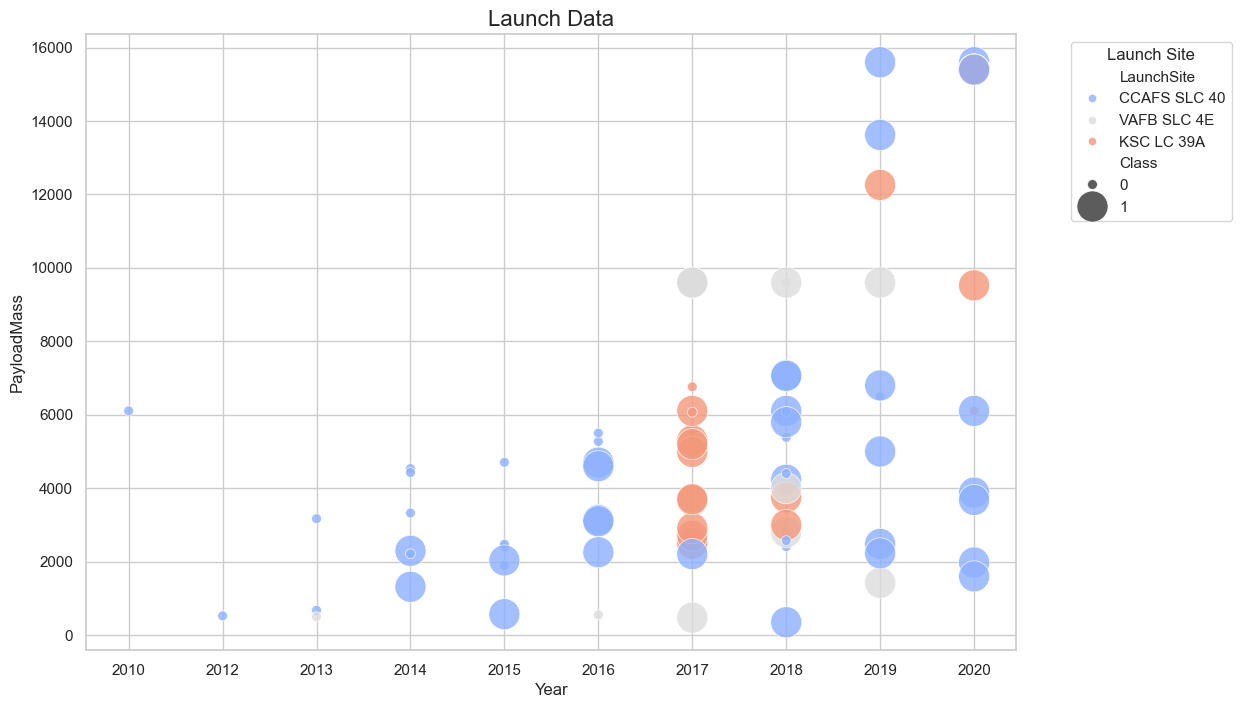

In [45]:
# Configuração do estilo
sns.set(style="whitegrid")

# Criar o gráfico de dispersão
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    data=df,  # Substitua 'df' pelo nome do seu DataFrame
    x="Year",  # Eixo x
    y="PayloadMass",  # Eixo y
    size="Class",  # Tamanho das bolotas
    hue="LaunchSite",  # Cores de acordo com LaunchSite
    palette="coolwarm",  # Paleta de cores
    sizes=(500, 50),  # Controlar o tamanho mínimo e máximo das bolotas
    alpha=0.8  # Transparência para evitar sobreposição excessiva
)

# Adicionar título e rótulos
scatter.set_title("Launch Data", fontsize=16)
scatter.set_xlabel("Year", fontsize=12)
scatter.set_ylabel("PayloadMass", fontsize=12)

# Melhorar a legenda
plt.legend(title="Launch Site", bbox_to_anchor=(1.05, 1), loc="upper left")

# Mostrar o gráfico
plt.show()

In [38]:
fix_data = df.groupby(['LaunchSite','Year','Class'])["PayloadMass"].mean().reset_index()
fix_data

,LaunchSite,Year,Class,PayloadMass
0,CCAFS SLC 40,2010,0,6104.959412
1,CCAFS SLC 40,2012,0,525.000000
2,CCAFS SLC 40,2013,0,1923.500000
3,CCAFS SLC 40,2014,0,3626.000000
4,CCAFS SLC 40,2014,1,1806.000000
5,CCAFS SLC 40,2015,0,2869.250000
6,CCAFS SLC 40,2015,1,1302.000000
7,CCAFS SLC 40,2016,0,5385.500000
8,CCAFS SLC 40,2016,1,3557.800000
9,CCAFS SLC 40,2017,1,2205.000000


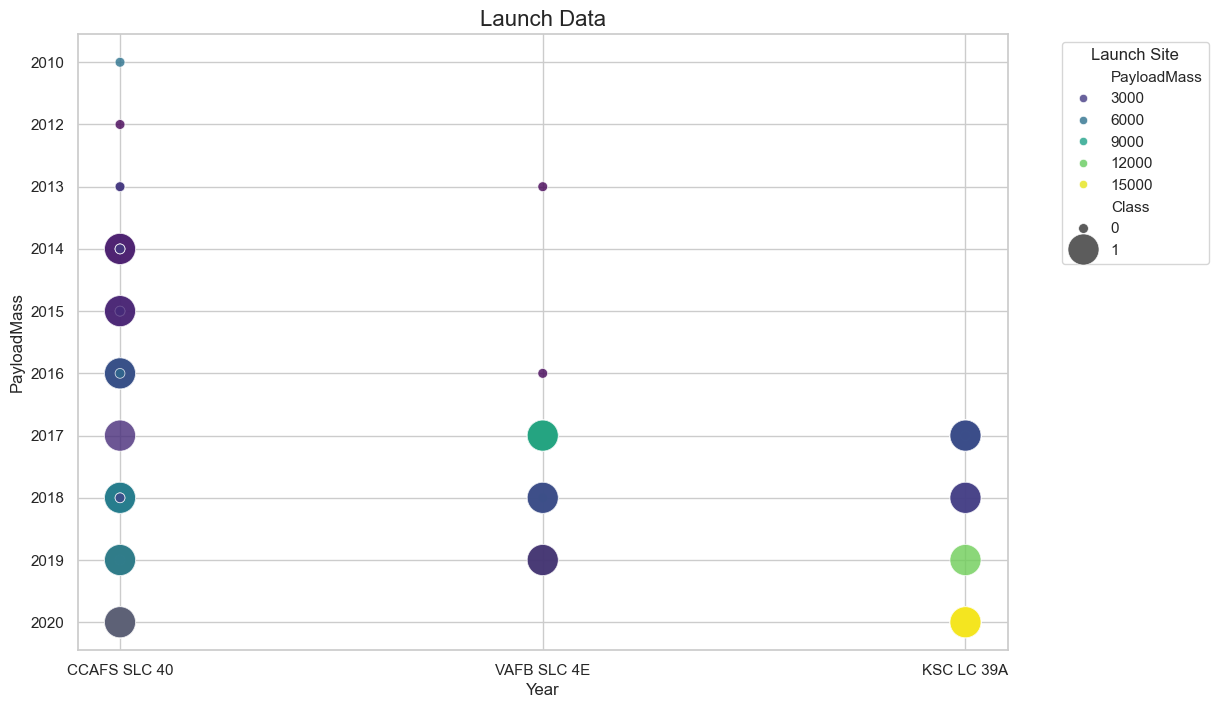

In [47]:
# Configuração do estilo
sns.set(style="whitegrid")

# Criar o gráfico de dispersão
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    data=df,  # Substitua 'df' pelo nome do seu DataFrame
    x="LaunchSite",  # Eixo x
    y="Year",  # Eixo y
    size="Class",  # Tamanho das bolotas
    hue="PayloadMass",  # Cores de acordo com LaunchSite
    palette="viridis",  # Paleta de cores
    sizes=(500, 50),  # Controlar o tamanho mínimo e máximo das bolotas
    alpha=0.8  # Transparência para evitar sobreposição excessiva
)

# Adicionar título e rótulos
scatter.set_title("Launch Data", fontsize=16)
scatter.set_xlabel("Year", fontsize=12)
scatter.set_ylabel("PayloadMass", fontsize=12)

# Melhorar a legenda
plt.legend(title="Launch Site", bbox_to_anchor=(1.05, 1), loc="upper left")

# Mostrar o gráfico
plt.show()

   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  Year  
0            0  B0003  -80.577366  28.561857

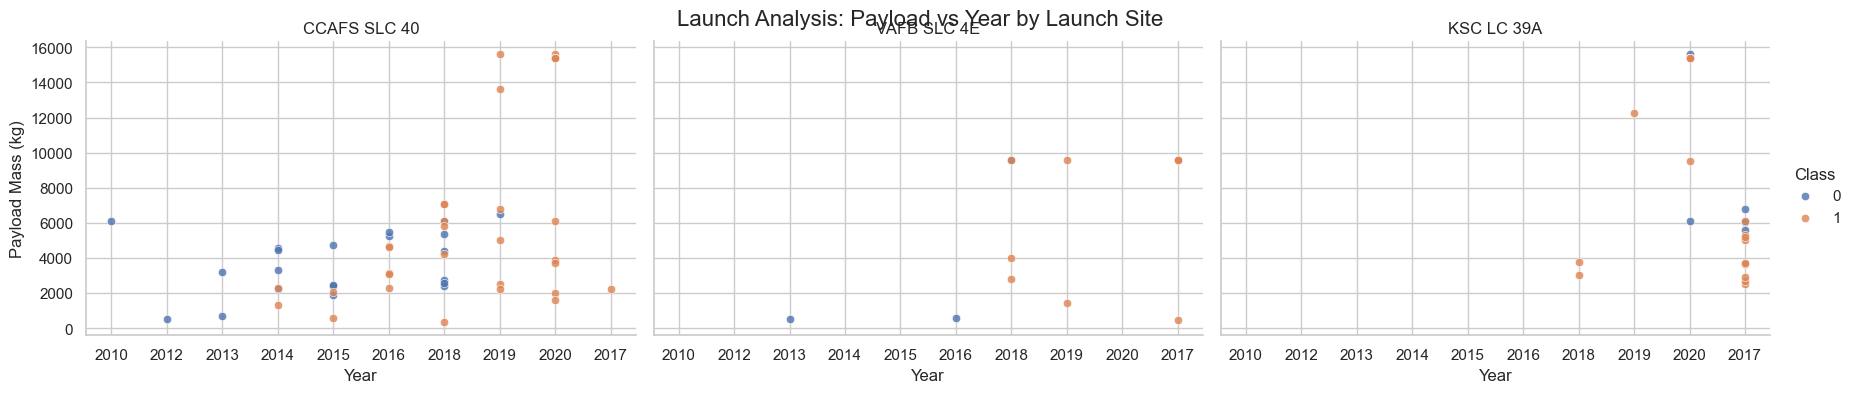

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar o estilo
sns.set_theme(style="whitegrid")

# Garantir que os dados estão corretos
print(df.head())  # Verifique se 'Class', 'Year', e 'PayloadMass' existem no DataFrame

# Criar o FacetGrid para treliças condicionais
g = sns.FacetGrid(
    data=df, 
    col="LaunchSite",  # Colunas separadas por LaunchSite
    hue="Class",       # Cores separadas por sucesso (1) ou fracasso (0)
    height=4, 
    aspect=1.5
)

# Adicionar o scatterplot aos painéis
# REMOVA o argumento 'style' e ajuste 'sizes' no contexto do FacetGrid
g.map(
    sns.scatterplot, 
    "Year", 
    "PayloadMass", 
    alpha=0.8
)

# Adicionar títulos e ajustar
g.set_titles("{col_name}")
g.set_axis_labels("Year", "Payload Mass (kg)")
g.add_legend(title="Class")

# Ajustar espaçamento entre os gráficos
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Launch Analysis: Payload vs Year by Launch Site", fontsize=16)

# Mostrar o gráfico
plt.show()


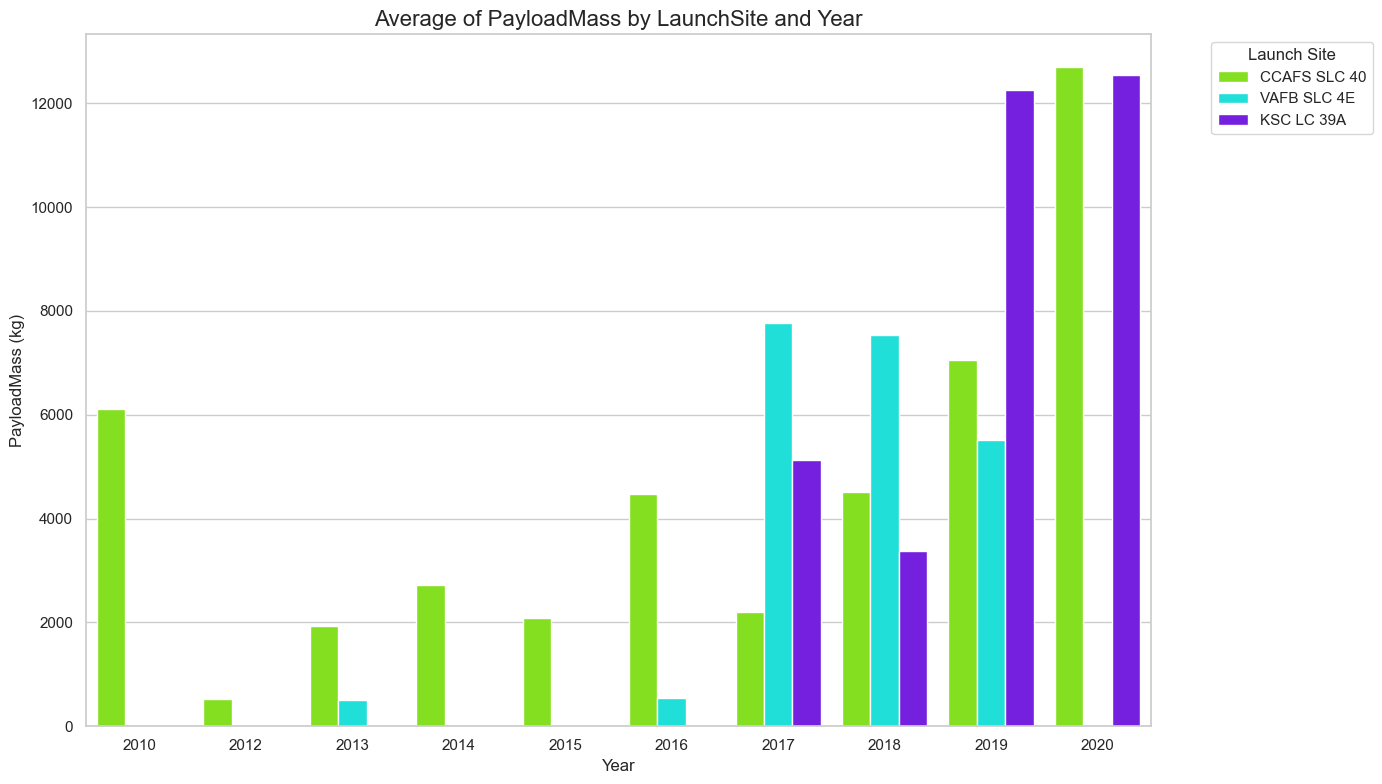

In [58]:
# Criar o DataFrame com os dados fornecidos
data = {
    "LaunchSite": ["CCAFS SLC 40", "CCAFS SLC 40", "CCAFS SLC 40", "CCAFS SLC 40", "CCAFS SLC 40",
                   "CCAFS SLC 40", "CCAFS SLC 40", "CCAFS SLC 40", "CCAFS SLC 40", "CCAFS SLC 40",
                   "CCAFS SLC 40", "CCAFS SLC 40", "CCAFS SLC 40", "CCAFS SLC 40", "CCAFS SLC 40",
                   "CCAFS SLC 40", "KSC LC 39A", "KSC LC 39A", "KSC LC 39A", "KSC LC 39A", "KSC LC 39A",
                   "KSC LC 39A", "VAFB SLC 4E", "VAFB SLC 4E", "VAFB SLC 4E", "VAFB SLC 4E", "VAFB SLC 4E",
                   "VAFB SLC 4E"],
    "Year": [2010, 2012, 2013, 2014, 2014, 2015, 2015, 2016, 2016, 2017, 2018, 2018, 2019, 2019, 2020, 2020,
             2017, 2017, 2018, 2019, 2020, 2020, 2013, 2016, 2017, 2018, 2018, 2019],
    "Class": [0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1],
    "PayloadMass": [6104.959412, 525.0, 1923.5, 3626.0, 1806.0, 2869.25, 1302.0, 5385.5, 3557.8, 2205.0,
                    3936.475, 5103.493235, 6500.0, 7621.616667, 15400.0, 9985.723583, 6143.666667, 4119.106601,
                    3375.0, 12259.0, 10852.479706, 14225.0, 500.0, 553.0, 7775.0, 9600.0, 5466.666667, 5512.5]
}

df = pd.DataFrame(data)

# Agrupar os dados para calcular a média de PayloadMass por LaunchSite e Year
grouped_data = df.groupby(["LaunchSite", "Year"])["PayloadMass"].mean().reset_index()

# Criar o gráfico de barras
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(
    data=grouped_data,
    x="Year",
    y="PayloadMass",
    hue="LaunchSite",
    palette="hsv"
)

# Configurar título e rótulos
bar_plot.set_title("Average of PayloadMass by LaunchSite and Year", fontsize=16)
bar_plot.set_xlabel("Year", fontsize=12)
bar_plot.set_ylabel("PayloadMass (kg)", fontsize=12)

# Ajustar a legenda
plt.legend(title="Launch Site", bbox_to_anchor=(1.05, 1), loc="upper left")

# Exibir o gráfico
plt.tight_layout()
plt.show()

## Authors


<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


<a href="https://www.linkedin.com/in/nayefaboutayoun/">Nayef Abou Tayoun</a> is a Data Scientist at IBM and pursuing a Master of Management in Artificial intelligence degree at Queen's University.


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By | Change Description      |
| ----------------- | ------- | ---------- | ----------------------- |
| 2021-10-12        | 1.1     | Lakshmi Holla     | Modified markdown |
| 2020-09-20        | 1.0     | Joseph     | Modified Multiple Areas |
| 2020-11-10       | 1.1    | Nayef      | updating the input data |


Copyright © 2020 IBM Corporation. All rights reserved.
